### IMPORT LIBRARY  

In [2]:
! pip install -r requirements.txt



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:

import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

### Reading Image

Reads an image from the given path and converts it to RGB.

* Args:
    path (str): Path to the image file

* Returns: 
    np.ndarray: The image in RGB format, or None if the image could not be loaded


In [4]:


def image_read(path):
    image = cv2.imread(path)
    if image is not None:  # Check if the image is successfully loaded
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return image
    else:
        print(f"Failed to load image at {path}")
        return None


### Load and rename 

Renames images in a directory and loads them into a list.

* Args:
    - folder_path (str): Path to the directory containing the images

* Returns:
    - list of np.ndarray: List of images in RGB format



In [5]:
def rename_and_load_images(folder_path):
    images = []
    image_files = [
        f for f in os.listdir(folder_path) 
        if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.gif'))
    ]
    image_files.sort()  # Ensure consistent ordering
    
    for idx, filename in enumerate(image_files, start=1):
        # Construct the new filename
        new_filename = f"img_{idx:03d}.jpg"
        old_path = os.path.join(folder_path, filename)
        new_path = os.path.join(folder_path, new_filename)

        # Check if new path already exists before renaming
        if not os.path.exists(new_path):
            os.rename(old_path, new_path)
            print(f"Renamed {filename} to {new_filename}")
        else:
            print(f"File {new_filename} already exists, skipping rename")
            new_path = old_path  # Use the old path if renaming is skipped

        # Load the renamed image
        image = image_read(new_path)
        if image is not None:
            images.append(image)
        print(image.shape)
    return images

In [ ]:
# rename_and_load_images("train/real")

File img_001.jpg already exists, skipping rename
(1667, 2500, 3)
File img_002.jpg already exists, skipping rename
(3397, 5056, 3)
File img_003.jpg already exists, skipping rename
(1218, 1275, 3)
File img_004.jpg already exists, skipping rename
(683, 1024, 3)
File img_005.jpg already exists, skipping rename
(800, 1200, 3)
File img_006.jpg already exists, skipping rename
(743, 1024, 3)
File img_007.jpg already exists, skipping rename
(720, 1280, 3)
File img_008.jpg already exists, skipping rename
(683, 1024, 3)
File img_009.jpg already exists, skipping rename
(3456, 5184, 3)
File img_010.jpg already exists, skipping rename
(2715, 1922, 3)
File img_011.jpg already exists, skipping rename
(572, 1040, 3)
File img_012.jpg already exists, skipping rename
(1442, 2554, 3)
File img_013.jpg already exists, skipping rename
(600, 960, 3)
File img_014.jpg already exists, skipping rename
(682, 1024, 3)
File img_015.jpg already exists, skipping rename
(1207, 1800, 3)
File img_016.jpg already exists, s

[array([[[25, 18, 25],
         [25, 18, 25],
         [22, 15, 22],
         ...,
         [11, 10, 15],
         [10,  9, 14],
         [ 7,  6, 11]],
 
        [[25, 18, 25],
         [24, 17, 24],
         [25, 18, 25],
         ...,
         [ 8,  7, 12],
         [ 7,  6, 11],
         [ 6,  5, 10]],
 
        [[24, 17, 24],
         [24, 17, 24],
         [24, 17, 24],
         ...,
         [ 7,  6, 11],
         [ 8,  7, 12],
         [ 9,  8, 13]],
 
        ...,
 
        [[23, 26, 35],
         [17, 20, 29],
         [24, 27, 36],
         ...,
         [70, 63, 81],
         [62, 55, 73],
         [58, 52, 66]],
 
        [[21, 24, 33],
         [22, 25, 34],
         [24, 27, 36],
         ...,
         [64, 57, 75],
         [62, 55, 73],
         [59, 52, 70]],
 
        [[20, 23, 32],
         [21, 24, 33],
         [24, 27, 36],
         ...,
         [62, 55, 73],
         [59, 52, 70],
         [57, 50, 68]]], dtype=uint8),
 array([[[ 20,  19,  15],
         [ 19,  


### Displays the first num_images in a grid using subplot.

* Args:
    - images (list of np.ndarray): List of images in RGB format
    - cartoons (list of np.ndarray, optional): List of cartoon images in RGB format. Defaults to [].
    - num_images (int, optional): Number of images to display. Defaults to 10.


In [7]:
def display_images(images, cartoons=[], num_images=10):
    num_images = min(num_images, len(images))  # Limit to available images
    cols = 2  # Two columns: original and grayscale
    rows = num_images  # One row per image (original and grayscale)

    plt.figure(figsize=(10, rows * 5))  # Adjust figure size for better visibility

    for i in range(num_images):
        # Original image
        plt.subplot(rows, cols, 2 * i + 1)
        plt.imshow(images[i])  # Convert BGR to RGB for display
        plt.axis('off')
        plt.title(f"Original {i + 1}")
        
        # Cartoon image
        if cartoons and len(cartoons) > 0:            
            cartoon = cartoons[i]
            plt.subplot(rows, cols, 2 * i + 2)
            plt.imshow(cartoon)
            plt.axis('off')
            plt.title(f"Cartoon {i + 1}")

    plt.tight_layout()
    plt.show()

    


### Edge mask

Applies edge detection to a list of images using adaptive thresholding.

* Args:
    - images (list of np.ndarray): List of images in BGR format
    - line_size (int): Block size for adaptive thresholding. Must be odd.
    - blur_value (int): Kernel size for median blurring. Must be odd.

* Returns:
    - list of np.ndarray: List of edge-detected images in grayscale


In [8]:
def edge_mask(images, line_size, blur_value):
    edges_img = []
    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray_blur = cv2.medianBlur(gray, blur_value)
        edges = cv2.adaptiveThreshold(
            gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value
        )
        edges_img.append(edges)
    return edges_img

### Color Palette

Performs color quantization on an image using k-means clustering.

* Args:
    - images (list of np.ndarray): List of images in RGB format
    - k (int): Number of clusters for k-means clustering

* Returns:
    - list of np.ndarray: List of color-quantized images in RGB format


In [9]:
def color_quantization(images, k):
    results_img = []
    for img in images:
        # Transform the image
        data = np.float32(img).reshape((-1, 3))
        #Determine criteria
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
        #Implemting k-means
        ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
        center = np.uint8(center)
        result = center[label.flatten()]
        result = result.reshape(img.shape)
        results_img.append(result)
        # plt.imshow(result)
        # plt.show()
    return results_img

### Reduice Noise

Reduces noise in an image using bilateral filtering.

* Args:
    - result (list of np.ndarray): List of images in RGB format

* Returns:
    - list of np.ndarray: List of noise-reduced images in RGB format


In [10]:

def noise_removal(result):
    blurred_img=[]
    for img in result:
        # result = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)
        blurred = cv2.bilateralFilter(img, d=3, sigmaColor=200,sigmaSpace=200)
        blurred_img.append(blurred)
        
    return blurred_img


### Cartoonization

Cartoonizes an image by combining edge detection and color quantization.

* Args:
    - blurred (list of np.ndarray): List of blurred images in RGB format
    - edge (list of np.ndarray): List of edge-detected images in grayscale

* Returns:
   - list of np.ndarray: List of cartoonized images in RGB format


In [11]:
def cartoonize(blurred, edge):
    Cartoons_img = []
    for i, img in enumerate(blurred):
        cartoon = cv2.bitwise_and(img, img, mask=edge[i])
        Cartoons_img.append(cartoon)

    return Cartoons_img

### SAVING cartoon image

Saves cartoon images to the specified output folder.

* Args:
    - cartoons (list of np.ndarray): List of cartoon images to save
    - output_folder (str): Path to folder where images will be saved


In [12]:
def save_cartoons(cartoons, output_folder):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
        
    # Save each cartoon image
    for i, cartoon in enumerate(cartoons):
        # Convert RGB to BGR for saving
        cartoon_bgr = cv2.cvtColor(cartoon, cv2.COLOR_RGB2BGR)
        
        # Construct output filename
        output_path = os.path.join(output_folder, f"cartoon_{i+1:03d}.jpg")
        
        # Save the image
        cv2.imwrite(output_path, cartoon_bgr)
        print(f"Saved cartoon image to {output_path}")

### Execution 

Executes the cartoonization process.

* Args:
    - save (bool, optional): Whether to save the cartoonized images. Defaults to False.



In [13]:
def exec(save=False):
    folder_path = "train/real"
    images_list = rename_and_load_images(folder_path)
    print(f"Loaded {len(images_list)} images.")
    # Display the first 10 images
    display_images(images=images_list, num_images=3)

    edges = edge_mask(images=images_list, line_size=5, blur_value=7)

    results = color_quantization(images=images_list, k=9)

    blurreds = noise_removal(result=results)

    cartoons_list=cartoonize(blurred=blurreds,edge=edges)
    print(f"Number of images cartoonized : {len(cartoons_list)}")
 
    # Display the first 10 images
    display_images(images=images_list,cartoons=cartoons_list, num_images=3)

    if save==True:
        save_cartoons(cartoons=cartoons_list, output_folder=folder_path+"\cartoon")

File img_001.jpg already exists, skipping rename
(1667, 2500, 3)
File img_002.jpg already exists, skipping rename
(3397, 5056, 3)
File img_003.jpg already exists, skipping rename
(1218, 1275, 3)
File img_004.jpg already exists, skipping rename
(683, 1024, 3)
File img_005.jpg already exists, skipping rename
(800, 1200, 3)
File img_006.jpg already exists, skipping rename
(743, 1024, 3)
File img_007.jpg already exists, skipping rename
(720, 1280, 3)
File img_008.jpg already exists, skipping rename
(683, 1024, 3)
File img_009.jpg already exists, skipping rename
(3456, 5184, 3)
File img_010.jpg already exists, skipping rename
(2715, 1922, 3)
File img_011.jpg already exists, skipping rename
(572, 1040, 3)
File img_012.jpg already exists, skipping rename
(1442, 2554, 3)
File img_013.jpg already exists, skipping rename
(600, 960, 3)
File img_014.jpg already exists, skipping rename
(682, 1024, 3)
File img_015.jpg already exists, skipping rename
(1207, 1800, 3)
File img_016.jpg already exists, s

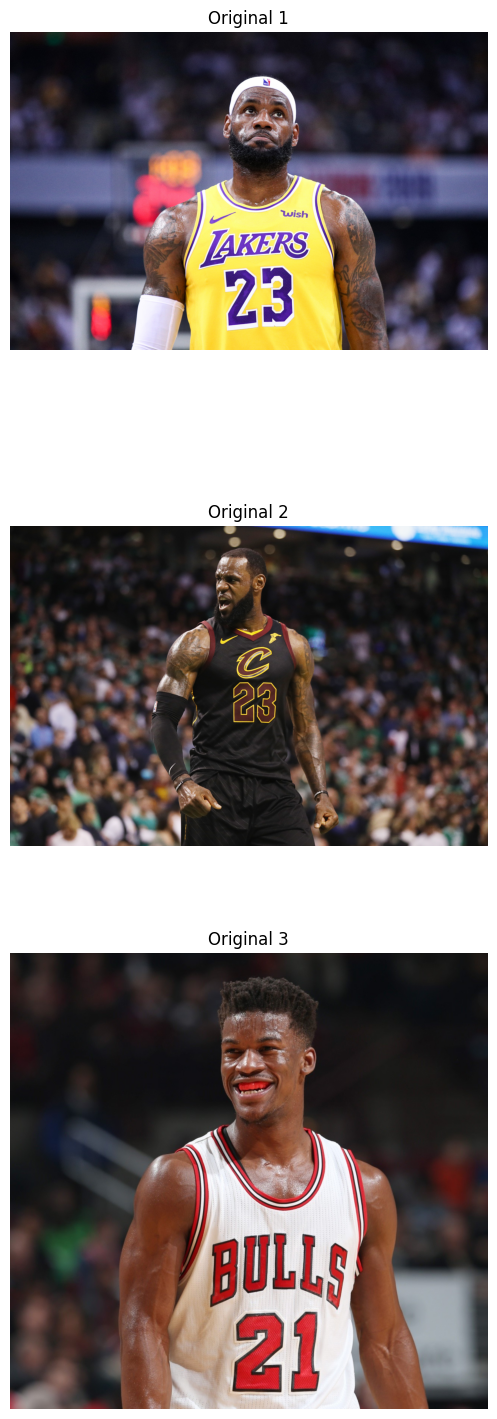

Number of images cartoonized : 260


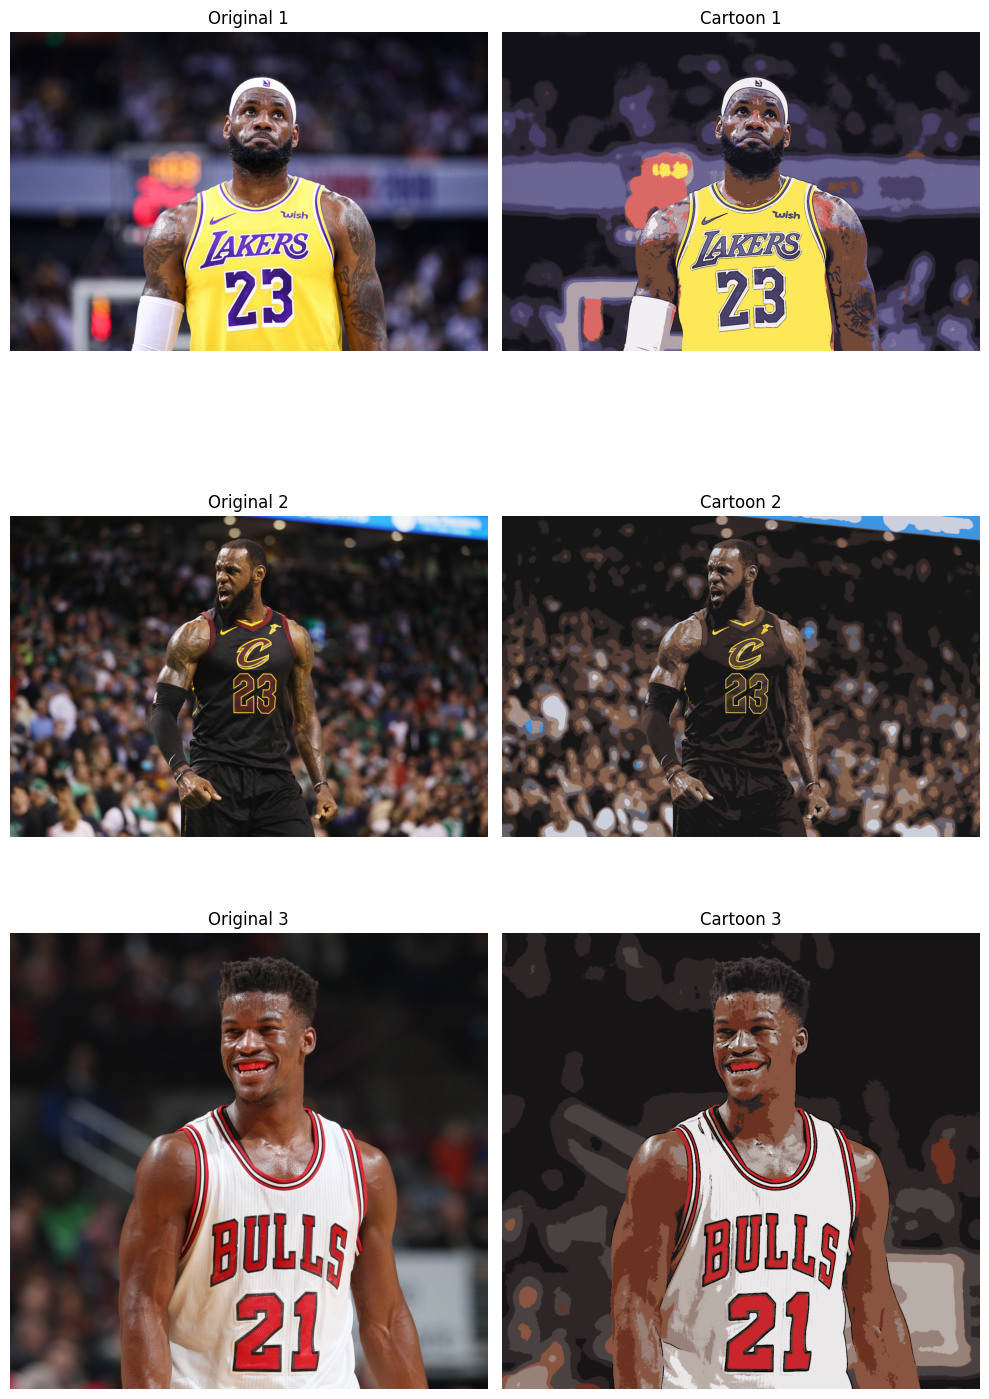

Saved cartoon image to train/real\cartoon\cartoon_001.jpg
Saved cartoon image to train/real\cartoon\cartoon_002.jpg
Saved cartoon image to train/real\cartoon\cartoon_003.jpg
Saved cartoon image to train/real\cartoon\cartoon_004.jpg
Saved cartoon image to train/real\cartoon\cartoon_005.jpg
Saved cartoon image to train/real\cartoon\cartoon_006.jpg
Saved cartoon image to train/real\cartoon\cartoon_007.jpg
Saved cartoon image to train/real\cartoon\cartoon_008.jpg
Saved cartoon image to train/real\cartoon\cartoon_009.jpg
Saved cartoon image to train/real\cartoon\cartoon_010.jpg
Saved cartoon image to train/real\cartoon\cartoon_011.jpg
Saved cartoon image to train/real\cartoon\cartoon_012.jpg
Saved cartoon image to train/real\cartoon\cartoon_013.jpg
Saved cartoon image to train/real\cartoon\cartoon_014.jpg
Saved cartoon image to train/real\cartoon\cartoon_015.jpg
Saved cartoon image to train/real\cartoon\cartoon_016.jpg
Saved cartoon image to train/real\cartoon\cartoon_017.jpg
Saved cartoon 

In [14]:
#%% Example usage

cartoonized_images = exec(save=True)

In [15]:

import pandas as pd

# Read and display the sports.csv file
df = pd.read_csv('sports.csv')
print(df)

       class id                    filepaths           labels data set
0             0     train/air hockey/001.jpg       air hockey    train
1             0     train/air hockey/002.jpg       air hockey    train
2             0     train/air hockey/003.jpg       air hockey    train
3             0     train/air hockey/004.jpg       air hockey    train
4             0     train/air hockey/005.jpg       air hockey    train
...         ...                          ...              ...      ...
14488        99  valid/wingsuit flying/1.jpg  wingsuit flying    valid
14489        99  valid/wingsuit flying/2.jpg  wingsuit flying    valid
14490        99  valid/wingsuit flying/3.jpg  wingsuit flying    valid
14491        99  valid/wingsuit flying/4.jpg  wingsuit flying    valid
14492        99  valid/wingsuit flying/5.jpg  wingsuit flying    valid

[14493 rows x 4 columns]


In [16]:
df

,class id,filepaths,labels,data set
0,0,train/air hockey/001.jpg,air hockey,train
1,0,train/air hockey/002.jpg,air hockey,train
2,0,train/air hockey/003.jpg,air hockey,train
3,0,train/air hockey/004.jpg,air hockey,train
4,0,train/air hockey/005.jpg,air hockey,train
...,...,...,...,...
14488,99,valid/wingsuit flying/1.jpg,wingsuit flying,valid
14489,99,valid/wingsuit flying/2.jpg,wingsuit flying,valid
14490,99,valid/wingsuit flying/3.jpg,wingsuit flying,valid
14491,99,valid/wingsuit flying/4.jpg,wingsuit flying,valid


In [17]:
import os
import csv

def create_image_csv_with_class_ids(directory, output_csv, dataset="train"):
    """
    Creates a CSV file with information about images in a directory, assigning a unique class_id for each label.
    
    Args:
        directory (str): Path to the base directory containing image folders.
        output_csv (str): Path to the output CSV file.
        dataset (str): Data set type (e.g., 'train', 'test').
        
    CSV Columns:
        - class id: Unique integer representing the class.
        - filepaths: Path to the image relative to the base directory.
        - labels: Label extracted from folder names.
        - data set: Data set type (e.g., 'train').
    """
    rows = []  # List to hold CSV rows
    label_to_class_id = {}  # Dictionary to store mapping of labels to class IDs
    current_class_id = 0  # Start assigning class IDs from 0
    base_path_len = len(directory.rstrip(os.sep)) + 1  # Base directory length for relative paths

    for root, _, files in os.walk(directory):
        label = os.path.basename(root)  # Use folder name as label
        if label not in label_to_class_id:
            label_to_class_id[label] = current_class_id
            current_class_id += 1  # Increment for the next label

        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif')):  # Image file extensions
                relative_path = os.path.join(root, file)[base_path_len:]  # Relative path to the image
                row = {
                    "class id": label_to_class_id[label],
                    "filepaths": os.path.join(dataset, relative_path).replace("\\", "/"),
                    "labels": label,
                    "data set": dataset
                }
                rows.append(row)

    # Write rows to CSV
    with open(output_csv, mode="w", newline="") as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=["class id", "filepaths", "labels", "data set"])
        writer.writeheader()
        writer.writerows(rows)
    print(f"CSV file created at {output_csv} with {len(rows)} rows and {len(label_to_class_id)} unique classes.")


In [18]:
# Base directory containing image folders
base_directory = "train"

# Output CSV file path
output_csv_file = "image_basket.csv"

# Generate CSV
create_image_csv_with_class_ids(base_directory, output_csv_file, dataset="train")


CSV file created at image_basket.csv with 780 rows and 3 unique classes.
